In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("bmd_logistic_regression.csv")

In [3]:
df

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


id=id of individual
age=age of person
sex=gender of a person
fracture= fracture status of person
weight and height given
medication= medication any person is taking
waiting time:- 
bmd= Bone mineral density of individual.


# PREDICTION:-Making model to predict weather a person can get fracture or not.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    object 
 7   waiting_time  169 non-null    int64  
 8   bmd           169 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.0+ KB


In [5]:
#So we have total of 9 columns out of which 6 are numercial and 3 are categorical columns.
#Data set has 169 rows and 9 columns

# PREPROCESSING.

In [6]:
df.isnull().sum()/len(df)*100

id              0.0
age             0.0
sex             0.0
fracture        0.0
weight_kg       0.0
height_cm       0.0
medication      0.0
waiting_time    0.0
bmd             0.0
dtype: float64

In [7]:
#So there are no null values in this data set

In [8]:
#Droping id column as i donot require id column in my analysis.

In [9]:
df.drop("id",axis=1,inplace=True)

In [10]:
df.head()

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


# UNIVARIATE ANALYSIS.

In [11]:
df.describe()

,age,weight_kg,height_cm,waiting_time,bmd
count,169.000000,169.000000,169.000000,169.000000,169.000000
mean,63.631531,64.665680,160.254438,19.739645,0.783104
std,12.356936,11.537171,7.928272,15.800570,0.166529
min,35.814058,36.000000,142.000000,5.000000,0.407600
25%,54.424211,56.000000,154.000000,9.000000,0.670800
50%,63.487837,64.500000,160.500000,14.000000,0.786100
75%,72.080558,73.000000,166.000000,24.000000,0.888800
max,88.753795,96.000000,177.000000,96.000000,1.362400


In [12]:
num_col=df.select_dtypes(include=["int","float"])
num_col.columns

Index(['age', 'weight_kg', 'height_cm', 'waiting_time', 'bmd'], dtype='object')

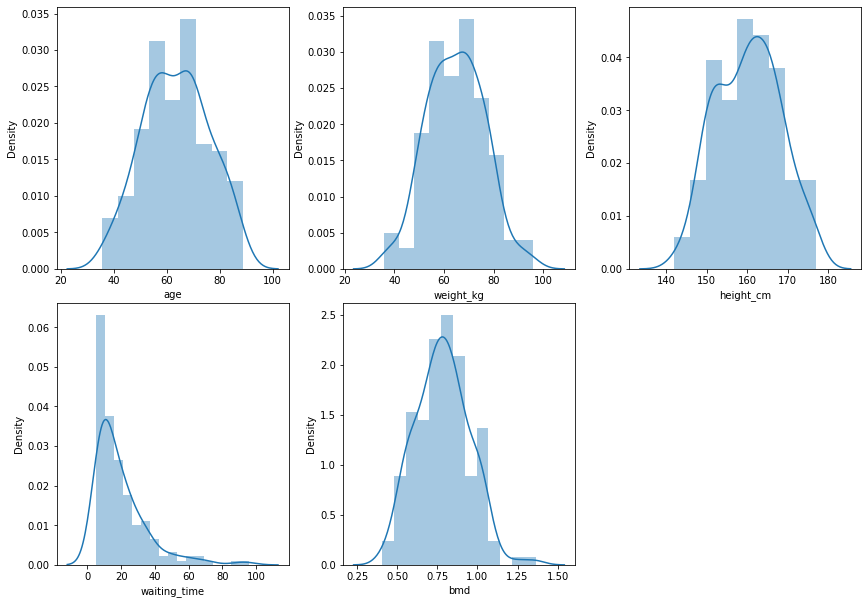

In [13]:
plt.figure(figsize=(12,12))
count=1
for i in num_col:
    plt.subplot(3,3,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [14]:
# ALL COLUMNS ARE NORMALLY DISTRIBUTED , ONLY WAITING TIME IS SLIGHTLY SKEWEED.

In [15]:
cat_col=df.select_dtypes(include="O")
cat_col.columns

Index(['sex', 'fracture', 'medication'], dtype='object')

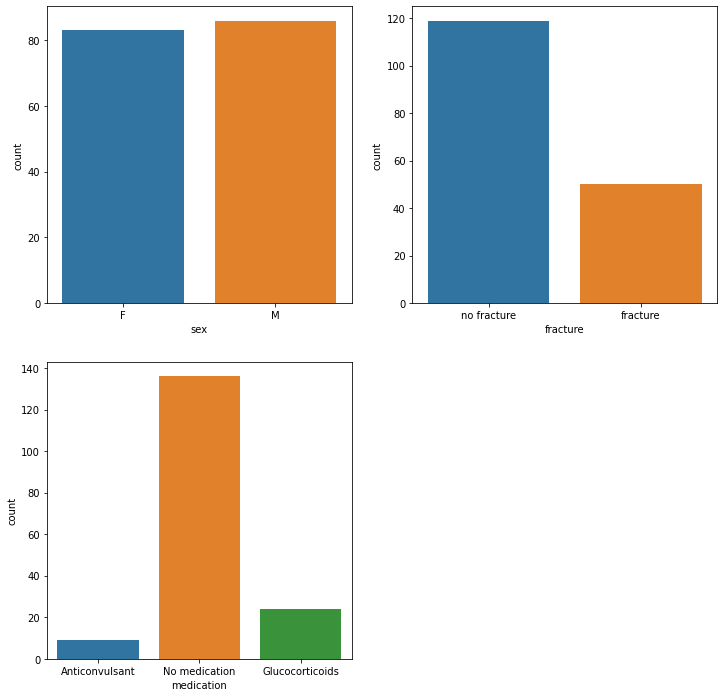

In [16]:
plt.figure(figsize=(12,12))
count=1
for i in cat_col:
    plt.subplot(2,2,count)
    sns.countplot(df[i])
    count+=1
plt.show()

In [17]:
#(1)Male and female count is almost equal
#(2)My target variable Fracture is imbalanced(On the side of no fracture)
#(3)highest number of people are not on any medications.

# Bivariate analysis.

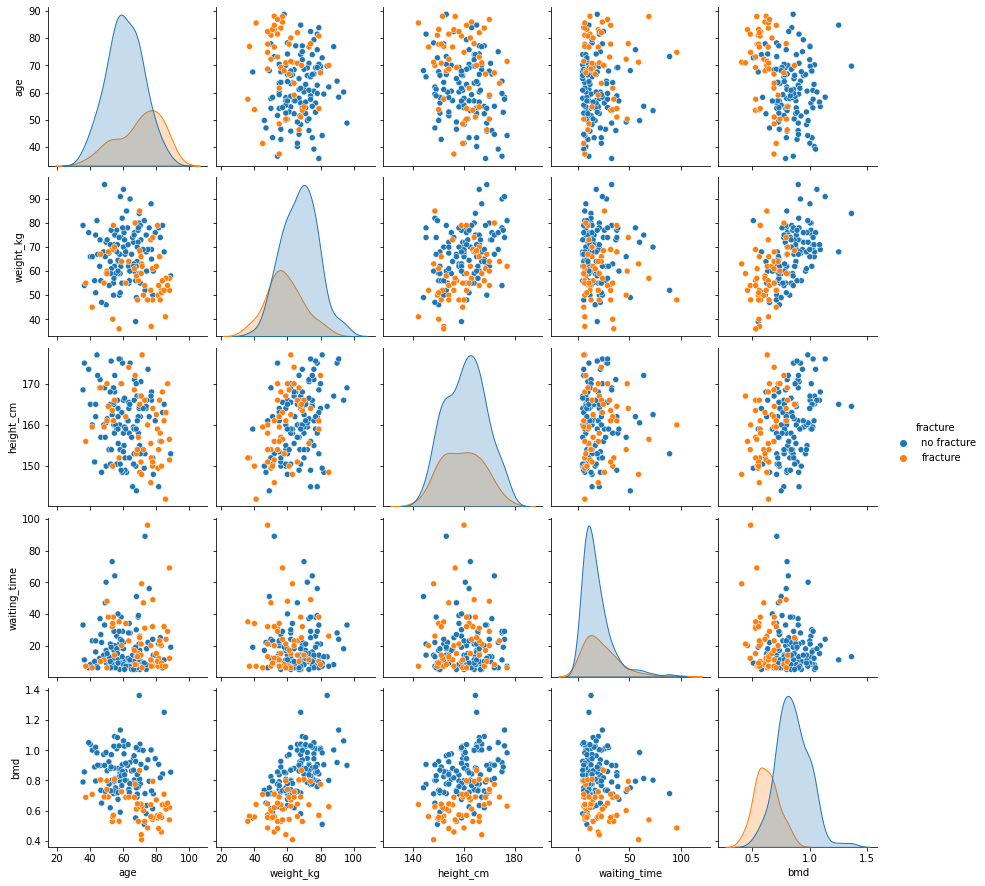

In [18]:
sns.pairplot(df,hue="fracture")
plt.show()

*********************************************ANALYSIS********************************************************
(1)Aged people have high chance of getting fracture
(2)people with low body weught are getting more fractures
(3)Height has no impact on getting fracture
(4)People with less bone density have high chance of getting fracture.

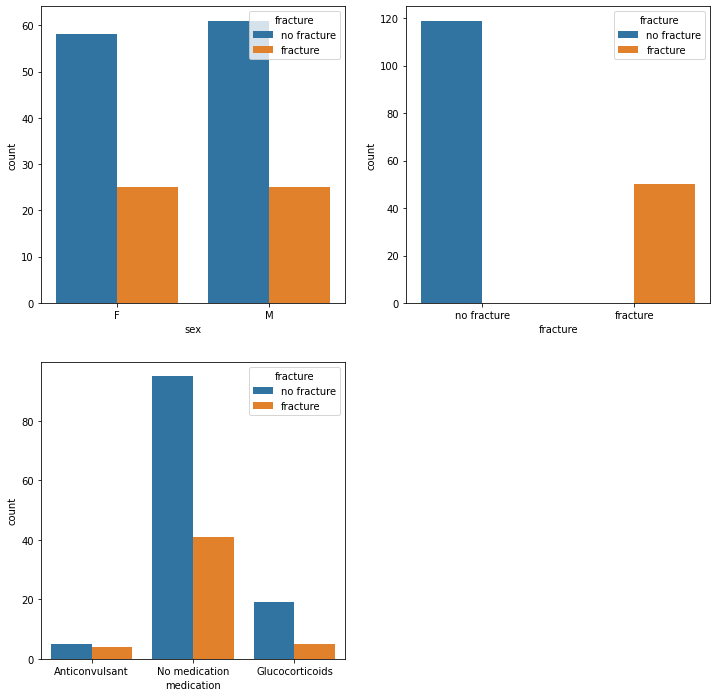

In [19]:
plt.figure(figsize=(12,12))
count=1
for i in cat_col:
    plt.subplot(2,2,count)
    sns.countplot(x=i,hue="fracture",data=df)
    count+=1
plt.show()

# FEATURE ENGINERRING.

In [20]:
df["sex"].unique()

array(['F', 'M'], dtype=object)

In [21]:
def gender(i):
    if 'F' in i:
        return(0)
    else:
        return(1)
    

In [22]:
df["sex"]=df['sex'].map(gender)

In [23]:
df["sex"]=df["sex"].astype("int")

In [24]:
df["fracture"].unique()

array(['no fracture', 'fracture'], dtype=object)

In [25]:
def fracture(i):
    if "no fracture" in i:
        return(0)
    else:
        return(1)

In [26]:
df["fracture"]=df["fracture"].map(fracture)

In [27]:
df["fracture"]=df["fracture"].astype("int")

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df["medication"].unique()

array(['Anticonvulsant', 'No medication', 'Glucocorticoids'], dtype=object)

In [31]:
df["medication"]=le.fit_transform(df["medication"])

In [32]:
df["age"]=df["age"].astype("int")

In [33]:
df["FRACTURE"]=df["fracture"]

In [34]:
df.drop("fracture",axis=1,inplace=True)

In [35]:
df.head()

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd,FRACTURE
0,57,0,64.0,155.5,0,18,0.8793,0
1,75,0,78.0,162.0,2,56,0.7946,0
2,70,1,73.0,170.5,2,10,0.9067,0
3,78,0,60.0,148.0,2,14,0.7112,0
4,54,1,55.0,161.0,2,20,0.7909,0


In [36]:
#df.drop("waiting_time",axis=1,inplace=True)

In [37]:
df.head()

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd,FRACTURE
0,57,0,64.0,155.5,0,18,0.8793,0
1,75,0,78.0,162.0,2,56,0.7946,0
2,70,1,73.0,170.5,2,10,0.9067,0
3,78,0,60.0,148.0,2,14,0.7112,0
4,54,1,55.0,161.0,2,20,0.7909,0


# FREQUENCY OF TARGET VARIABLE.

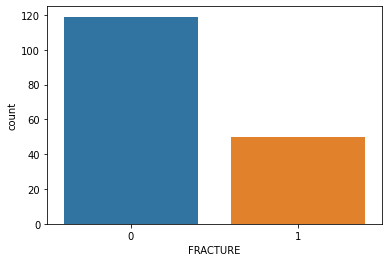

In [38]:
sns.countplot(df["FRACTURE"])
plt.show()

In [39]:
#my target is imabalanced.

<AxesSubplot:>

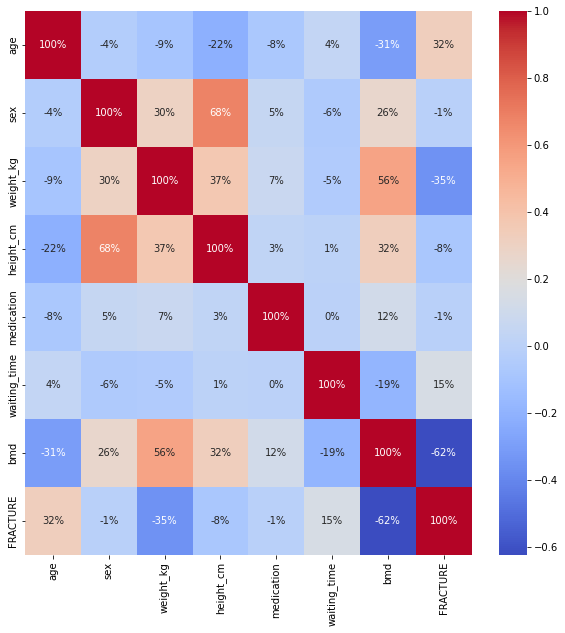

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap="coolwarm")

# SPLITTING DATA.

In [41]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=25)

# FEATURE SCALING.

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc=StandardScaler()

In [45]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# MODEL BUILDING.

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
reg=LogisticRegression()

In [48]:
reg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

# EVALUATION.

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        93
           1       0.78      0.67      0.72        42

    accuracy                           0.84       135
   macro avg       0.82      0.79      0.80       135
weighted avg       0.83      0.84      0.83       135

Test Data
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.75      0.75      0.75         8

    accuracy                           0.88        34
   macro avg       0.84      0.84      0.84        34
weighted avg       0.88      0.88      0.88        34



# SINCE MY DATA IS IMABALANCED MY FOUCS IS ON F1 SCORE.

# I WILL TRY TO INCREASE MY F1 SCORE.

# To cross check i will also see ROC_AUC curve, greater the area under curve better is my model.

# Since data is related to medical issue Recall is also imp will try to get good F1 score which will also iomprove my recall rate.

# MODEL BUILDING USING PROBAILITY.

In [52]:
y_train_proba=reg.predict_proba(X_train)[:,1]
y_train_proba  

array([2.21321705e-01, 3.37247032e-01, 1.40723661e-02, 3.96561932e-01,
       1.08180317e-02, 1.53636033e-01, 8.17909670e-01, 5.64215565e-02,
       2.64604840e-01, 3.39290858e-02, 1.61385129e-02, 5.54945537e-02,
       4.34743497e-01, 5.67471550e-01, 1.83258600e-01, 9.15383529e-02,
       4.75414545e-01, 2.26085732e-01, 8.56713616e-01, 9.09192293e-01,
       3.82015765e-01, 1.95698803e-01, 1.73147328e-01, 1.09297219e-02,
       2.07694857e-01, 9.57918321e-01, 2.31061267e-01, 5.50084390e-02,
       1.25861176e-02, 9.75946297e-02, 1.91625277e-02, 6.81799048e-01,
       2.13987211e-01, 7.43251164e-01, 1.37330085e-02, 6.62737046e-01,
       1.01436879e-01, 1.70152102e-01, 7.33756123e-03, 4.09237716e-01,
       1.00125692e-02, 9.19455815e-01, 2.88529027e-02, 8.03797367e-04,
       2.92083120e-01, 6.93999794e-01, 8.72552691e-02, 2.27793728e-01,
       6.49325042e-02, 4.61578126e-01, 2.43543269e-02, 4.95426659e-01,
       1.41828480e-01, 5.51649434e-02, 2.05363080e-02, 1.71825439e-01,
      

In [53]:
y_test_proba=reg.predict_proba(X_test)[:,1]
y_test_proba 

array([0.98403382, 0.27390405, 0.88538246, 0.48907349, 0.64736985,
       0.03560771, 0.0354662 , 0.02656327, 0.02266761, 0.01632762,
       0.81098738, 0.05362909, 0.02157377, 0.13602791, 0.24847509,
       0.02913752, 0.03002153, 0.7486326 , 0.96268996, 0.0735136 ,
       0.2965641 , 0.3864627 , 0.02219771, 0.55222276, 0.0089032 ,
       0.0110682 , 0.35657484, 0.49193801, 0.24834052, 0.02150087,
       0.63308693, 0.13072194, 0.10761112, 0.32073554])

# PR CURVE.

In [54]:
from sklearn.metrics import precision_recall_curve

In [55]:
p,r,th=precision_recall_curve(y_train,y_train_proba)

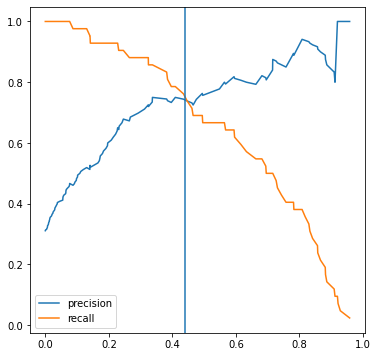

In [56]:
plt.figure(figsize=(6,6))
sns.lineplot(x=th,y=p[:-1],label="precision")
sns.lineplot(x=th,y=r[:-1],label="recall")
plt.axvline(0.44)
plt.show()

In [57]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score
def metrics(y_actual,y_train_proba,th):
    y_pred_temp=[1 if p>th else 0 for p in y_train_proba]
    accuracy=accuracy_score(y_actual,y_pred_temp)
    recall=recall_score(y_actual,y_pred_temp)
    precision=precision_score(y_actual,y_pred_temp)
    f1=f1_score(y_actual,y_pred_temp)
    roc_auc=roc_auc_score(y_actual,y_pred_temp)
    return {"F1":f1,"ROC_AUC":roc_auc,"Accuracy_score":accuracy,"Recall":recall}

In [58]:
print("Train Data")
print(metrics(y_train,y_train_proba,0.43))
print("Test Data")
print(metrics(y_test,y_test_proba,0.43))

Train Data
{'F1': 0.7529411764705882, 'ROC_AUC': 0.8218125960061443, 'Accuracy_score': 0.8444444444444444, 'Recall': 0.7619047619047619}
Test Data
{'F1': 0.6666666666666665, 'ROC_AUC': 0.7980769230769231, 'Accuracy_score': 0.8235294117647058, 'Recall': 0.75}


In [59]:
from sklearn.metrics import roc_curve

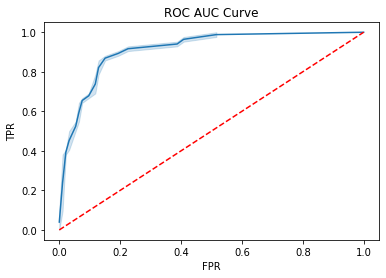

In [60]:
fpr,tpr,th=roc_curve(y_train,y_train_proba)
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0.0,1],y=[0.0,1],color="red",linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.show()

# I have decided to keep threshold value at 0.44 giving my model best possible F1_SCORE.

F1_SCORE:- For train:73%
           For test:-67%

RECALL:- 75% FOR BOTH

ROC_AUC:- 80%

# HYPER PARAMETER TUNNING.

In [61]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid={"C":np.arange(1,15),"class_weight":["balanced","None"]}

In [87]:
grid_reg=GridSearchCV(reg,param_grid=param_grid,scoring="f1",cv=5,n_jobs=-1)
grid_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'class_weight': ['balanced', 'None']},
             scoring='f1')

In [88]:
grid_reg.best_params_

{'C': 1, 'class_weight': 'balanced'}

In [89]:
grid_reg.best_score_ 

0.7797041623667011

In [90]:
grid_train_pred=grid_reg.predict(X_train)
grid_test_pred=grid_reg.predict(X_test)

In [91]:
print("Train data")
print(classification_report(y_train,grid_train_pred))
print(classification_report(y_test,grid_test_pred))

Train data
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        93
           1       0.72      0.86      0.78        42

    accuracy                           0.85       135
   macro avg       0.82      0.85      0.84       135
weighted avg       0.86      0.85      0.85       135

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        26
           1       0.62      1.00      0.76         8

    accuracy                           0.85        34
   macro avg       0.81      0.90      0.83        34
weighted avg       0.91      0.85      0.86        34

